# Lab1: part 5 - Simulations

In this session we will go over [iteration](https://applieddatascience.cmp.uea.ac.uk/09/2/Iteration.html) and [simulations](https://applieddatascience.cmp.uea.ac.uk/09/3/Simulation.html), as well as introduce the concept of [randomness](https://applieddatascience.cmp.uea.ac.uk/09/Randomness.html).

The data used in this lab will contain salary data and other statistics for basketball players from the 2014-2015 NBA season. This data was collected from the following sports analytic sites: [Basketball Reference](http://www.basketball-reference.com) and [Spotrac](http://www.spotrac.com).

First, set up the tests and imports by running the cell below.

In [2]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
import pandas as pd

# These lines do some fancy plotting magic
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


## 1. Nachos and Conditionals

In Python, the boolean data type contains only two unique values:  `True` and `False`. Expressions containing comparison operators such as `<` (less than), `>` (greater than), and `==` (equal to) evaluate to Boolean values. A list of common comparison operators can be found below!

<img src="comparisons.png">

Run the cell below to see an example of a comparison operator in action.

In [3]:
3 > 1 + 1

True

We can even assign the result of a comparison operation to a variable.

In [4]:
result = 10 / 2 == 5
result

True

Arrays are compatible with comparison operators. The output is an array of boolean values.

In [5]:
np.array([1, 5, 7, 8, 3, -1]) > 3

array([False,  True,  True,  True, False, False])

One day, when you come home after a long week, you see a hot bowl of nachos waiting on the dining table! Let's say that whenever you take a nacho from the bowl, it will either have only **cheese**, only **salsa**, **both** cheese and salsa, or **neither** cheese nor salsa (a sad tortilla chip indeed). 

Let's try and simulate taking nachos from the bowl at random using the function, `np.random.choice(...)`.

### `np.random.choice`

`np.random.choice` picks one item at random from the given array. It is equally likely to pick any of the items. Run the cell below several times, and observe how the results change.

In [6]:
nachos = np.array(['cheese', 'salsa', 'both', 'neither'])
np.random.choice(nachos)

'salsa'

To repeat this process multiple times, pass in an int `n` as the second argument to return `n` different random choices. By default, `np.random.choice` samples **with replacement** and returns an *array* of items. 

Run the next cell to see an example of sampling with replacement 10 times from the `nachos` array.

In [7]:
np.random.choice(nachos, 10)

array(['cheese', 'salsa', 'neither', 'neither', 'both', 'salsa', 'salsa',
       'neither', 'both', 'neither'], dtype='<U7')

To count the number of times a certain type of nacho is randomly chosen, we can use `np.count_nonzero`

### `np.count_nonzero`

`np.count_nonzero` counts the number of non-zero values that appear in an array. When an array of boolean values are passed through the function, it will count the number of `True` values (remember that in Python, `True` is coded as 1 and `False` is coded as 0.)

Run the next cell to see an example that uses `np.count_nonzero`.

In [9]:
np.count_nonzero(np.array([True, False, False, True, True]))

3

**Question 1.** Assume we took ten nachos at random, and stored the results in an array called `ten_nachos` as done below. Find the number of nachos with only cheese using code (do not hardcode the answer).  

*Hint:* Our solution involves a comparison operator (e.g. `=`, `<`, ...) and the `np.count_nonzero` method.

<!--
BEGIN QUESTION
name: q11
-->

In [13]:
ten_nachos = np.array(['neither', 'cheese', 'both', 'both', 'cheese', 'salsa', 'both', 'neither', 'cheese', 'both'])
number_cheese = np.count_nonzero(ten_nachos == 'cheese')
number_cheese

3

**Conditional Statements**

A conditional statement is a multi-line statement that allows Python to choose among different alternatives based on the truth value of an expression.

Here is a basic example.

```
def sign(x):
    if x > 0:
        return 'Positive'
    else:
        return 'Negative'
```

If the input `x` is greater than `0`, we return the string `'Positive'`. Otherwise, we return `'Negative'`.

If we want to test multiple conditions at once, we use the following general format.

```
if <if expression>:
    <if body>
elif <elif expression 0>:
    <elif body 0>
elif <elif expression 1>:
    <elif body 1>
...
else:
    <else body>
```

Only the body for the first conditional expression that is true will be evaluated. Each `if` and `elif` expression is evaluated and considered in order, starting at the top. As soon as a true value is found, the corresponding body is executed, and the rest of the conditional statement is skipped. If none of the `if` or `elif` expressions are true, then the `else body` is executed. 

For more examples and explanation, refer to the section on conditional statements [here](https://www.inferentialthinking.com/chapters/09/1/conditional-statements.html).

**Question 2.** Complete the following conditional statement so that the string `'More please'` is assigned to the variable `say_please` if the number of nachos with cheese in `ten_nachos` is less than `5`.

*Hint*: You should be using `number_cheese` from Question 1.

<!--
BEGIN QUESTION
name: q12
-->

In [15]:
say_please = '?'

if (number_cheese <5):
    say_please = 'More please'
say_please

'More please'

**Question 3.** Write a function called `nacho_reaction` that returns a reaction (as a string) based on the type of nacho passed in as an argument. Use the table below to match the nacho type to the appropriate reaction.

<img src="nacho_reactions.png">

*Hint:* If you're failing the test, double check the spelling of your reactions.

<!--
BEGIN QUESTION
name: q13
-->

In [24]:
def nacho_reaction(nacho):
    if (nacho == "cheese"):
        return "Cheesy!"
    elif (nacho=="salsa") :
        return "Spicy!"
    elif (nacho == "both") :
        return "Wow!"
    elif (nacho == "neither") :
        return "Meh."

spicy_nacho = nacho_reaction('salsa')
spicy_nacho

TypeError: cannot perform reduce with flexible type

**Question 4.** Create a table `ten_nachos_reactions` that consists of the nachos in `ten_nachos` as well as the reactions for each of those nachos. The columns should be called `Nachos` and `Reactions`.

*Hint:* Use the `apply` method. 

<!--
BEGIN QUESTION
name: q14
-->

In [29]:
ten_nachos_tbl = pd.DataFrame({'Nachos': ten_nachos})
ten_nachos_reactions = ten_nachos_tbl.copy()
ten_nachos_reactions["Reactions"] = ten_nachos_reactions["Nachos"].apply(nacho_reaction)
ten_nachos_reactions

,Nachos,Reactions
0,neither,Meh.
1,cheese,Cheesy!
2,both,Wow!
3,both,Wow!
4,cheese,Cheesy!
5,salsa,Spicy!
6,both,Wow!
7,neither,Meh.
8,cheese,Cheesy!
9,both,Wow!


**Question 5.** Using code, find the number of 'Wow!' reactions for the nachos in `ten_nachos_reactions`.

<!--
BEGIN QUESTION
name: q15
-->

In [32]:
number_wow_reactions = np.count_nonzero(ten_nachos_reactions["Reactions"]=="Wow!")
number_wow_reactions

4

## 2. Simulations and For Loops
Using a `for` statement, we can perform a task multiple times. This is known as iteration.

One use of iteration is to loop through a set of values. For instance, we can print out all of the colors of the rainbow.

In [34]:
rainbow = np.array(["red", "orange", "yellow", "green", "blue", "indigo", "violet"])

for color in rainbow:
    print(color)

red
orange
yellow
green
blue
indigo
violet


We can see that the indented part of the `for` loop, known as the body, is executed once for each item in `rainbow`. The name `color` is assigned to the next value in `rainbow` at the start of each iteration. Note that the name `color` is arbitrary; we could easily have named it something else. The important thing is we stay consistent throughout the `for` loop. 

In [35]:
for another_name in rainbow:
    print(another_name)

red
orange
yellow
green
blue
indigo
violet


In general, however, we would like the variable name to be somewhat informative. 

**Question 1.** In the following cell, we've loaded the text of _Pride and Prejudice_ by Jane Austen, split it into individual words, and stored these words in an array `p_and_p_words`. Using a `for` loop, assign `longer_than_five` to the number of words in the novel that are more than 5 letters long.

*Hint*: You can find the number of letters in a word with the `len` function.

<!--
BEGIN QUESTION
name: q21
-->

In [48]:
austen_string = open('Austen_PrideAndPrejudice.txt', encoding='utf-8').read()
p_and_p_words = np.array(austen_string.split())

longer_than_five = np.array([])

for word in p_and_p_words:
    if (len(word) > 5):
        longer_than_five = np.append(longer_than_five, word)

# a for loop would be useful here

len(longer_than_five)

35453

**Question 2.** Using a simulation with 10,000 trials, assign num_different to the number of times, in 10,000 trials, that two words picked uniformly at random (with replacement) from Pride and Prejudice have different lengths. 

*Hint 1*: What function did we use in section 1 to sample at random with replacement from an array? 

*Hint 2*: Remember that `!=` checks for non-equality between two items.

<!--
BEGIN QUESTION
name: q22
-->

In [54]:
trials = 10000
num_different = 0

for i in range(trials):
    w1 = np.random.choice(p_and_p_words)
    w2 = np.random.choice(p_and_p_words)
    if (len(w1) != len(w2)):
        num_different = num_different + 1
num_different

8633

We can also use `np.random.choice` to simulate multiple trials.

**Question 3.** Allie is playing darts. Her dartboard contains ten equal-sized zones with point values from 1 to 10. Write code that simulates her total score after 1000 dart tosses.

*Hint:* First decide the possible values you can take in the experiment (point values in this case). Then use `np.random.choice` to simulate Allie's tosses. Finally, sum up the scores to get Allie's total score.

<!--
BEGIN QUESTION
name: q23
-->

In [98]:
possible_point_values = np.arange(1,11,1)
num_tosses = 1000
simulated_tosses = np.random.choice(possible_point_values, num_tosses)
total_score = sum(simulated_tosses)
total_score

5466

## 3. Sampling Basketball Data

We will now introduce the topic of sampling, which we’ll be discussing in more depth in this week’s lectures. We’ll guide you through this code, but if you wish to read more about different kinds of samples before attempting this question, you can check out [section 10 of the textbook](https://www.inferentialthinking.com/chapters/10/Sampling_and_Empirical_Distributions.html).

Run the cell below to load player and salary data that we will use for our sampling. 

In [100]:
player_data = pd.read_csv("player_data.csv")
player_data.head(3)

,Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
0,James Harden,25,HOU,81,459,565,154,60,321,2217
1,Chris Paul,29,LAC,82,376,838,156,15,190,1564
2,Stephen Curry,26,GSW,80,341,619,163,16,249,1900


In [101]:
salary_data = pd.read_csv("salary_data.csv")
salary_data.head(3)

,PlayerName,Salary
0,Kobe Bryant,23500000
1,Amar'e Stoudemire,23410988
2,Joe Johnson,23180790


In [102]:
full_data = player_data.join(salary_data.set_index('PlayerName'), on='Name')

full_data.head(3)

,Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points,Salary
0,James Harden,25,HOU,81,459,565,154,60,321,2217,14728844
1,Chris Paul,29,LAC,82,376,838,156,15,190,1564,20068563
2,Stephen Curry,26,GSW,80,341,619,163,16,249,1900,10629213


Rather than getting data on every player (as in the tables loaded above), imagine that we had gotten data on only a smaller subset of the players. For 492 players, it's not so unreasonable to expect to see all the data, but usually we aren't so lucky. 

If we want to make estimates about a certain numerical property of the population (known as a statistic, e.g. the mean or median), we may have to come up with these estimates based only on a smaller sample. Whether these estimates are useful or not often depends on how the sample was gathered. We have prepared some example sample datasets to see how they compare to the full NBA dataset. Later we'll ask you to create your own samples to see how they behave.

To save typing and increase the clarity of your code, we will package the analysis code into a few functions. This will be useful in the rest of the lab as we will repeatedly need to create histograms and collect summary statistics from that data.

We've defined the `histograms` function below, which takes a table with columns `Age` and `Salary` and draws a histogram for each one. It uses bin widths of 1 year for `Age` and $1,000,000 for `Salary`.

Two histograms should be displayed below


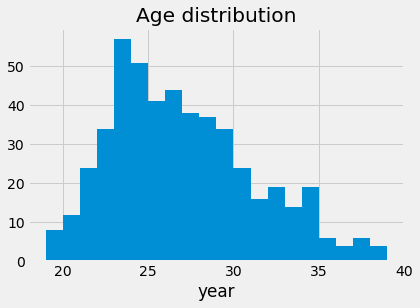

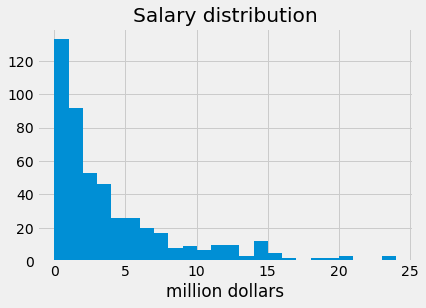

In [103]:
def histograms(t):
    ages = t['Age']
    salaries = t['Salary']/1000000
    
    t1 = t.drop(columns=['Salary'])
    t1['Salary'] = salaries
    
    age_bins = np.arange(min(ages), max(ages) + 2, 1) 
    salary_bins = np.arange(min(salaries), max(salaries) + 1, 1)
    t1.hist('Age', bins=age_bins)
    plt.xlabel('year')
    plt.title('Age distribution')
    
    t1.hist('Salary', bins=salary_bins)
    plt.xlabel('million dollars')
    plt.title('Salary distribution') 

histograms(full_data)
print('Two histograms should be displayed below')

**Question 1**. Create a function called `compute_statistics` that takes a table containing ages and salaries and:
- Draws a histogram of ages
- Draws a histogram of salaries
- Returns a two-element array containing the average age and average salary (in that order)

You can call the `histograms` function to draw the histograms! 

*Note:* More charts will be displayed when running the test cell. Please feel free to ignore the charts.

<!--
BEGIN QUESTION
name: q31
-->

array([2.65365854e+01, 4.26977577e+06])

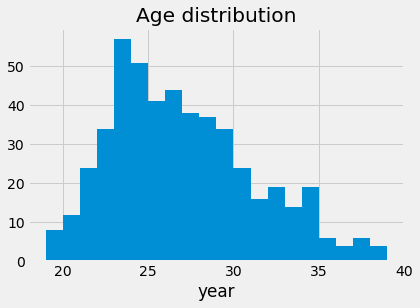

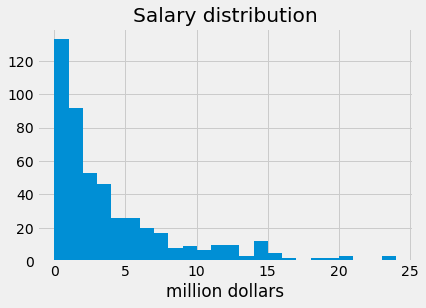

In [109]:
def compute_statistics(age_and_salary_data):
    histograms(age_and_salary_data)
    age = age_and_salary_data["Age"]
    salary = age_and_salary_data["Salary"]
    return np.array([np.mean(age), np.mean(salary)])

full_stats = compute_statistics(full_data)
full_stats

### Convenience sampling
One sampling methodology, which is **generally a bad idea**, is to choose players who are somehow convenient to sample.  For example, you might choose players from one team who are near your house, since it's easier to survey them.  This is called, somewhat pejoratively, *convenience sampling*.

Suppose you survey only *relatively new* players with ages less than 22.  (The more experienced players didn't bother to answer your surveys about their salaries.)

**Question 2.**  Assign `convenience_sample` to a subset of `full_data` that contains only the rows for players under the age of 22.

<!--
BEGIN QUESTION
name: q32
-->

In [110]:
convenience_sample = full_data[full_data["Age"]<22]
convenience_sample

,Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points,Salary
3,Anthony Davis,21,NOP,68,696,149,100,200,95,1656,5607240
29,Andre Drummond,21,DET,82,1104,55,73,153,120,1130,2568360
52,Giannis Antetokounmpo,20,MIL,81,542,207,73,85,173,1030,1873200
100,Steven Adams,21,OKC,70,523,66,38,86,99,537,2184960
112,Nerlens Noel,20,PHI,75,611,128,133,142,146,744,3315120
123,Michael Kidd-Gilchrist,21,CHO,55,416,77,30,38,63,598,5016960
125,Bradley Beal,21,WAS,63,241,194,76,18,123,962,4505280
153,Alex Len,21,PHO,69,454,32,34,105,74,432,3649920
172,Marcus Smart,20,BOS,67,222,208,99,18,90,523,3283320
175,Kentavious Caldwell-Pope,21,DET,82,255,109,93,18,94,1043,2772480


**Question 3.** Assign `convenience_stats` to an array of the average age and average salary of your convenience sample, using the `compute_statistics` function.  Since they're computed on a sample, these are called *sample averages*. 

<!--
BEGIN QUESTION
name: q33
-->

array([2.03636364e+01, 2.38353382e+06])

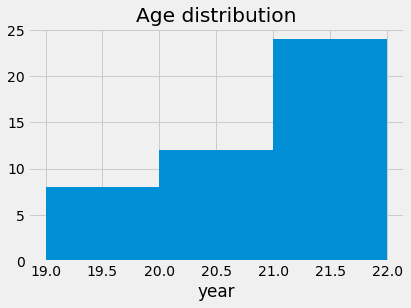

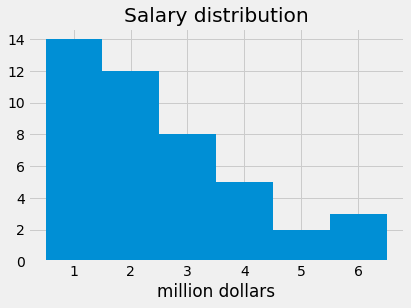

In [111]:
convenience_stats = compute_statistics(convenience_sample)
convenience_stats

*Write your answer here, replacing this text.*

### Simple random sampling
A more justifiable approach is to sample uniformly at random from the players.  In a **simple random sample (SRS) without replacement**, we ensure that each player is selected at most once. Imagine writing down each player's name on a card, putting the cards in an box, and shuffling the box.  Then, pull out cards one by one and set them aside, stopping when the specified sample size is reached.

### Producing simple random samples
Sometimes, it’s useful to take random samples even when we have the data for the whole population. It helps us understand sampling accuracy.

### `sample`

The table method `sample` produces a random sample from the table. By default, it draws at random **with replacement** from the rows of a table. It takes in the sample size as its argument and returns a **table** with only the rows that were selected. 

Run the cell below to see an example call to `sample()` with a sample size of 5, with replacement.

In [112]:
# Just run this cell

salary_data.sample(5)

,PlayerName,Salary
80,George Hill,8000000
354,Xavier Henry,1082000
23,Roy Hibbert,14898938
468,Jamaal Franklin,163296
200,Bojan Bogdanovic,3278000


The optional argument `with_replacement=False` can be passed through `sample()` to specify that the sample should be drawn without replacement.

Run the cell below to see an example call to `sample()` with a sample size of 5, without replacement.

In [113]:
# Just run this cell

salary_data.sample(5, replace=False)

,PlayerName,Salary
11,Derrick Rose,18862876
477,Dwight Buycks,62437
412,Jeff Withey,816482
50,Ty Lawson,11595506
293,Andrew Nicholson,1545840


**Question 5.** Produce a simple random sample of size 44 from `full_data`. Run your analysis on it again.  Run the cell a few times to see how the histograms and statistics change across different samples.

- How much does the average age change across samples? 
- What about average salary?

array([2.65227273e+01, 3.97848439e+06])

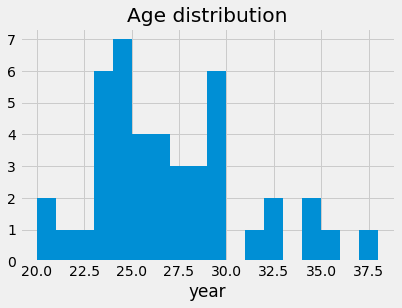

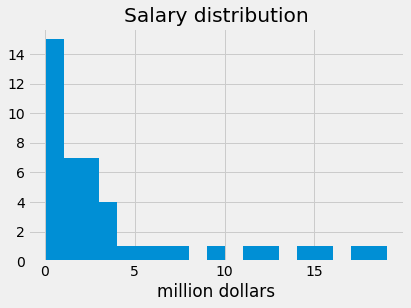

In [123]:
my_small_srswor_data = full_data.sample(44, replace= False)
my_small_stats = compute_statistics(my_small_srswor_data)
my_small_stats

**Question 6.** As in the previous question, analyze several simple random samples of size 100 from `full_data`.  
- Do the histogram shapes seem to change more or less across samples of 100 than across samples of size 44?  
- Are the sample averages and histograms closer to their true values/shape for age or for salary?  What did you expect to see?

array([2.64000000e+01, 3.93526957e+06])

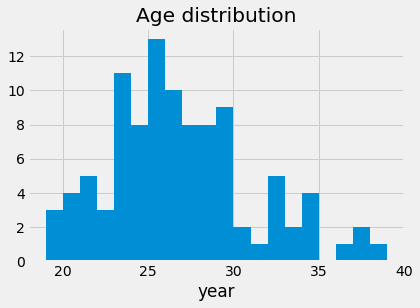

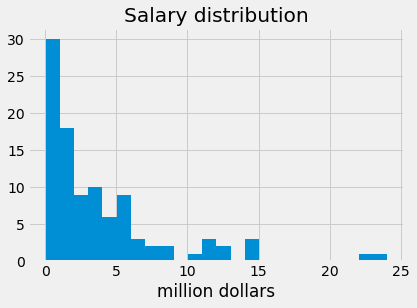

In [129]:
my_large_srswor_data = full_data.sample(100, replace= False)
my_large_stats = compute_statistics(my_large_srswor_data)
my_large_stats

The varieation of the sample mean age and salary decreases with an increased sample size